In [36]:
import pandas as pd

In [60]:
tissue_mut = pd.read_excel("tissue_mut.xlsx")
tissue_mut

,Tissue,Mutation site,Mutation,Frequency
0,Kidney,1519,A1519T,1
1,Kidney,2210,A2210P,1
2,Kidney,1483,C1483Y,1
3,Kidney,1888,F1888L,1
4,Kidney,5,G5R,1
...,...,...,...,...
874,Uterus,21,V21I,1
875,Uterus,1974,Y1974H,1
876,Vulva/Vagina,706,E706Q,1
877,Vulva/Vagina,526,R526C,1


In [108]:
df1 = tissue_mut.groupby(["Mutation site", "Tissue"], as_index=False)["Frequency"].sum()

In [164]:
df1.to_excel("count_mutation_site_to_Tissue.xlsx", index=False)

In [62]:
# Select mutations within FAT and kinase domains
select_rows = tissue_mut.loc[tissue_mut["Mutation site"]>=1263]
select_rows

,Tissue,Mutation site,Mutation,Frequency
0,Kidney,1519,A1519T,1
1,Kidney,2210,A2210P,1
2,Kidney,1483,C1483Y,1
3,Kidney,1888,F1888L,1
5,Kidney,1973,I1973F,1
...,...,...,...,...
870,Uterus,1630,V1630I,1
872,Uterus,2006,V2006F,1
873,Uterus,2006,V2006L,1
875,Uterus,1974,Y1974H,1


In [69]:
df = select_rows.groupby(["Mutation site", "Tissue"], as_index=False)["Frequency"].sum()

In [70]:
df

,Mutation site,Tissue,Frequency
0,1271,Bowel,3
1,1271,CNS/Brain,1
2,1271,Esophagus/Stomach,1
3,1271,Ovary/Fallopian Tube,1
4,1301,Bowel,5
...,...,...,...
518,2512,Uterus,2
519,2532,CNS/Brain,3
520,2532,Esophagus/Stomach,1
521,2532,Head and Neck,1


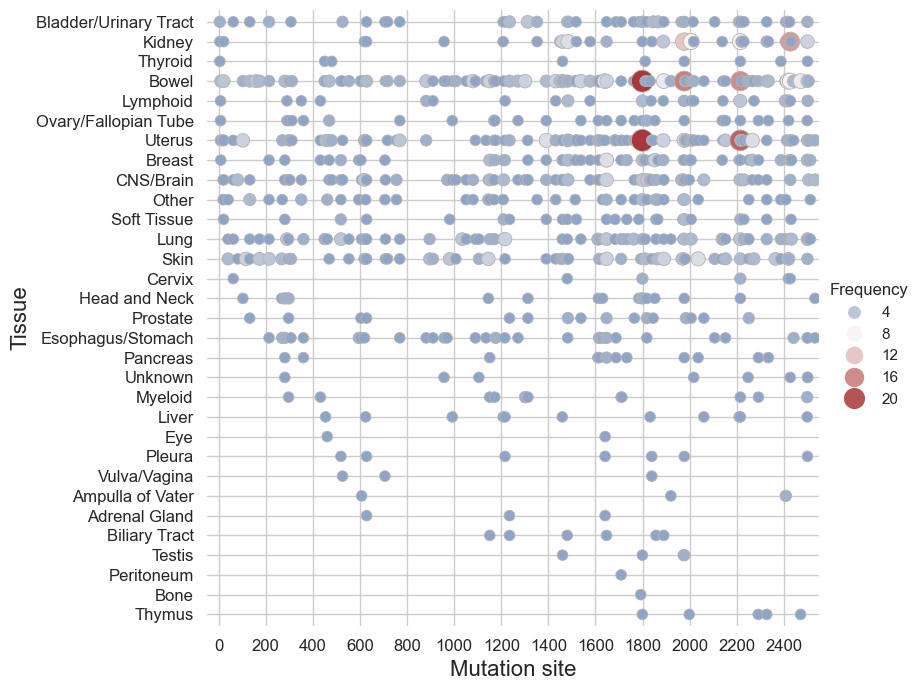

In [163]:
# Draw each cell as a scatter point with varying size and color
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# setting the dimensions of the plot
#fig, ax = plt.subplots(figsize=(12,6))

sns.relplot(data=df1, x="Mutation site", y="Tissue", hue="Frequency", size="Frequency",
    palette="vlag", hue_norm=(-5, 22), edgecolor=".7",
    height=7, aspect=1.2, sizes=(50, 250), size_norm=(0, 22))
plt.xlim(-50, 2550)
plt.xticks(range(0, 2550, 200), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Mutation site", fontsize=16)
plt.ylabel("Tissue", fontsize=16)
plt.margins(.02)
# Tweak the figure to finalize
sns.despine(left=True, bottom=True)
for label in g.ax.get_xticklabels():
    label.set_rotation(0)
plt.savefig("Tissue_mut.png", dpi=600)

In [165]:
mutation_data = pd.read_excel("mutation_data.xlsx")

In [166]:
mutation_data

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Sample_ID,...,VAF,Patient_ID,SIFT_Prediction,SIFT_Score,Polyphen_Prediction,Polyphen_Score,Oncotree_Code,Age,Tissue,Disease
0,MTOR,1,11174395,11174395,Missense_Mutation,SNP,A,A,T,TCGA-06-0122-01A-01D-1490-08,...,0.295918,TCGA-06-0122,deleterious,0.00,probably_damaging,0.996,GBM,84,CNS/Brain,Glioma
1,MTOR,1,11288885,11288885,Missense_Mutation,SNP,C,C,T,TCGA-17-Z032-01A-01W-0746-08,...,0.347561,TCGA-17-Z032,tolerated,0.47,probably_damaging,0.978,Unknown,NaN,Unknown,Unknown
2,MTOR,1,11190804,11190804,Missense_Mutation,SNP,C,C,T,TCGA-19-1790-01B-01D-1353-08,...,0.272727,TCGA-19-1790,tolerated,0.08,probably_damaging,0.996,GBM,56,CNS/Brain,Glioma
3,MTOR,1,11298641,11298641,Missense_Mutation,SNP,G,G,A,TCGA-22-5473-01A-01D-1632-08,...,0.319149,TCGA-22-5473,tolerated,0.13,probably_damaging,0.994,LUSC,78,Lung,Non-Small Cell Lung Cancer
4,MTOR,1,11272938,11272938,Missense_Mutation,SNP,C,C,T,TCGA-24-2254-01A-01W-0722-08,...,0.787879,TCGA-24-2254,tolerated,0.37,benign,0.057,OV,66,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,MTOR,1,11298606,11298606,Missense_Mutation,SNP,G,NaN,A,GENIE-PROV-b3fe7f53c0-21b6e6ac40,...,0.453608,GENIE-PROV-b3fe7f53c0,deleterious,0.00,probably_damaging,0.996,CCRCC,78,Kidney,Renal Cell Carcinoma
1443,MTOR,1,11308073,11308073,Missense_Mutation,SNP,C,NaN,T,GENIE-PROV-b559d48f87-5d40168414,...,0.341463,GENIE-PROV-b559d48f87,tolerated,0.20,benign,0.360,BLCA,75,Bladder/Urinary Tract,Bladder Cancer
1444,MTOR,1,11308088,11308088,Missense_Mutation,SNP,C,NaN,A,GENIE-PROV-9e373768eb-a09a2e0179,...,0.262673,GENIE-PROV-9e373768eb,deleterious,0.01,benign,0.020,UCEC,78,Uterus,Endometrial Cancer
1445,MTOR,1,11308088,11308088,Missense_Mutation,SNP,C,NaN,A,GENIE-PROV-9e373768eb-e12b9997cf,...,0.175739,GENIE-PROV-9e373768eb,deleterious,0.01,benign,0.020,UEC,78,Uterus,Endometrial Cancer


In [168]:
kdfat = mutation_data.loc[mutation_data["Protein_position"]>=1263]

In [169]:
heat = mutation_data.loc[mutation_data["Protein_position"]<1263]

In [171]:
kdfat.to_excel("kd_fat.xlsx", index=False)
heat.to_excel("heat.xlsx", index=False)

In [17]:
samples

array(['TCGA-06-0122-01A-01D-1490-08', 'TCGA-17-Z032-01A-01W-0746-08',
       'TCGA-19-1790-01B-01D-1353-08', ...,
       'GENIE-PROV-9e373768eb-a09a2e0179',
       'GENIE-PROV-9e373768eb-e12b9997cf',
       'GENIE-PROV-361fd9da2a-d9e47ec029'], dtype=object)

In [18]:
len(samples)

1373

In [19]:
patients = mutation_data["Patient_ID"].unique()

In [20]:
len(patients)

1294

In [21]:
cancer_type = mutation_data["Disease"].unique()
cancer_type

array(['Glioma', 'Unknown', 'Non-Small Cell Lung Cancer',
       'Adenomas and Adenocarcinomas',
       'Kidney renal papillary cell carcinoma', 'Endometrial Cancer',
       'Colorectal Cancer', 'Breast Cancer', 'Leukemia',
       'Esophagogastric Cancer', 'Bladder Cancer', 'Head and Neck Cancer',
       'Melanoma', 'Liver Cancer', 'Lower‑Grade Glioma',
       'Cervical Cancer', 'Prostate Cancer', 'Thymic Tumor', 'CNS Cancer',
       'Ovarian Cancer', 'Renal Cell Carcinoma',
       'Skin Cancer, Non-Melanoma', 'Small Bowel Cancer',
       'Mature T and NK Neoplasms', 'Cancer of Unknown Primary',
       'Mature B-Cell Neoplasms', 'Soft Tissue Sarcoma', 'Sellar Tumor',
       'Embryonal Tumor', 'Gastrointestinal Neuroendocrine Tumor',
       'Myeloproliferative Neoplasms', 'Mesothelioma',
       'Hepatobiliary Cancer', 'Pancreatic Cancer',
       'Gastrointestinal Stromal Tumor', 'Thyroid Cancer',
       'Vaginal Cancer', 'Appendiceal Cancer',
       'Myelodysplastic Syndromes', 'Breast 

In [22]:
print(len(cancer_type))

56
